In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn import metrics

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("Raabta_dataset - donations.csv")

In [3]:
df.shape

(372, 3)

In [5]:
col = ['body', 'Label']
df= df[col]
df= df[pd.notnull(df['body'])]
df.columns=['body', 'Label']
df['category_id'] = df['Label'].factorize()[0]
cat_id_df = df[["Label", "category_id"]].drop_duplicates().sort_values('category_id')
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['category_id','Label']].values)

In [6]:
df.head()

,body,Label,category_id
0,"I'm homeless, fleeing past abusers, and curren...",basicneeds,0
1,Hi I’m in deep trouble I’m about 90 miles away...,loan,1
2,[Charity Boxing Match](https://www.justgiving....,medical,2
3,paypal email : ollieboyles@gmail.com,misc,3
4,There are some truly serious things on this su...,misc,3


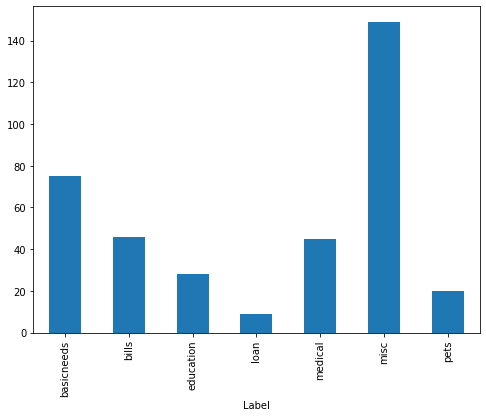

In [10]:
fig = plt.figure(figsize= (8,6))
df.groupby('Label').body.count().plot.bar(ylim=0)

In [11]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [13]:
features = tfidf.fit_transform(df.body).toarray()
labels = df.category_id
features.shape

(372, 884)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['body'], df['Label'], random_state= 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [16]:
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [18]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit report'])))

['basicneeds']


In [19]:
y_pred = clf.predict(count_vect.transform(X_test))

In [21]:
print(metrics.classification_report(y_test,y_pred, labels= df.Label, target_names=df['Label'].unique()))

              precision    recall  f1-score   support

  basicneeds       0.16      0.54      0.25        13
        loan       0.00      0.00      0.00         2
     medical       0.12      0.18      0.14        11
        misc       1.00      0.10      0.18        40
       bills       1.00      0.10      0.18        40
   education       0.26      0.64      0.37        11
        pets       1.00      0.11      0.20         9

    accuracy                           0.22      8346
   macro avg       0.55      0.26      0.20      8346
weighted avg       0.79      0.19      0.20      8346



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1870: UserWarning: labels size, 372, does not match size of target_names, 7
  .format(len(labels), len(target_names))
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
print(clf.score(count_vect.transform(X_train), y_train))

0.7992831541218638


In [24]:
print(clf.score(count_vect.transform(X_test), y_test))

0.22580645161290322
